# Kyphosis dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("kyphosis.csv")
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.shape

(81, 4)

In [5]:
df.size

324

In [6]:
df.ndim

2

In [12]:
df["Kyphosis"].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

# EDA

**pairplot**

C:\Users\Jayashree\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


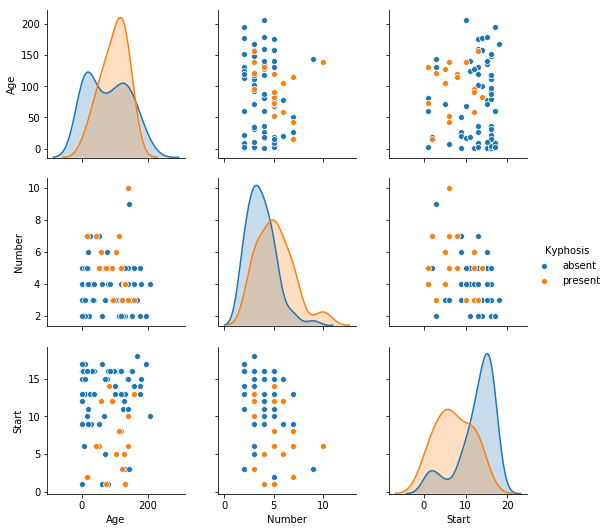

In [14]:
sns.pairplot(df,hue="Kyphosis")

**heatmap**

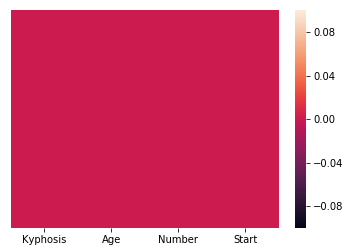

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True)

# train test split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x=df.drop("Kyphosis",axis=1)
y=df["Kyphosis"]

In [17]:
x.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [18]:
y.head()

0     absent
1     absent
2    present
3     absent
4     absent
Name: Kyphosis, dtype: object

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [20]:
x_train.shape

(64, 3)

In [21]:
x_test.shape

(17, 3)

# Decision tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dtree=DecisionTreeClassifier(criterion="gini",max_depth=None,min_samples_leaf=1,random_state=7)

In [27]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best')

# Prediction

In [28]:
pred=dtree.predict(x_test)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [31]:
accuracy=accuracy_score(y_test,pred)
accuracy

0.7647058823529411

In [33]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      absent       0.77      0.91      0.83        11
     present       0.75      0.50      0.60         6

   micro avg       0.76      0.76      0.76        17
   macro avg       0.76      0.70      0.72        17
weighted avg       0.76      0.76      0.75        17



In [34]:
print(confusion_matrix(y_test,pred))

[[10  1]
 [ 3  3]]


# Visualisation

In [37]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

In [38]:
features=list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [40]:
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)

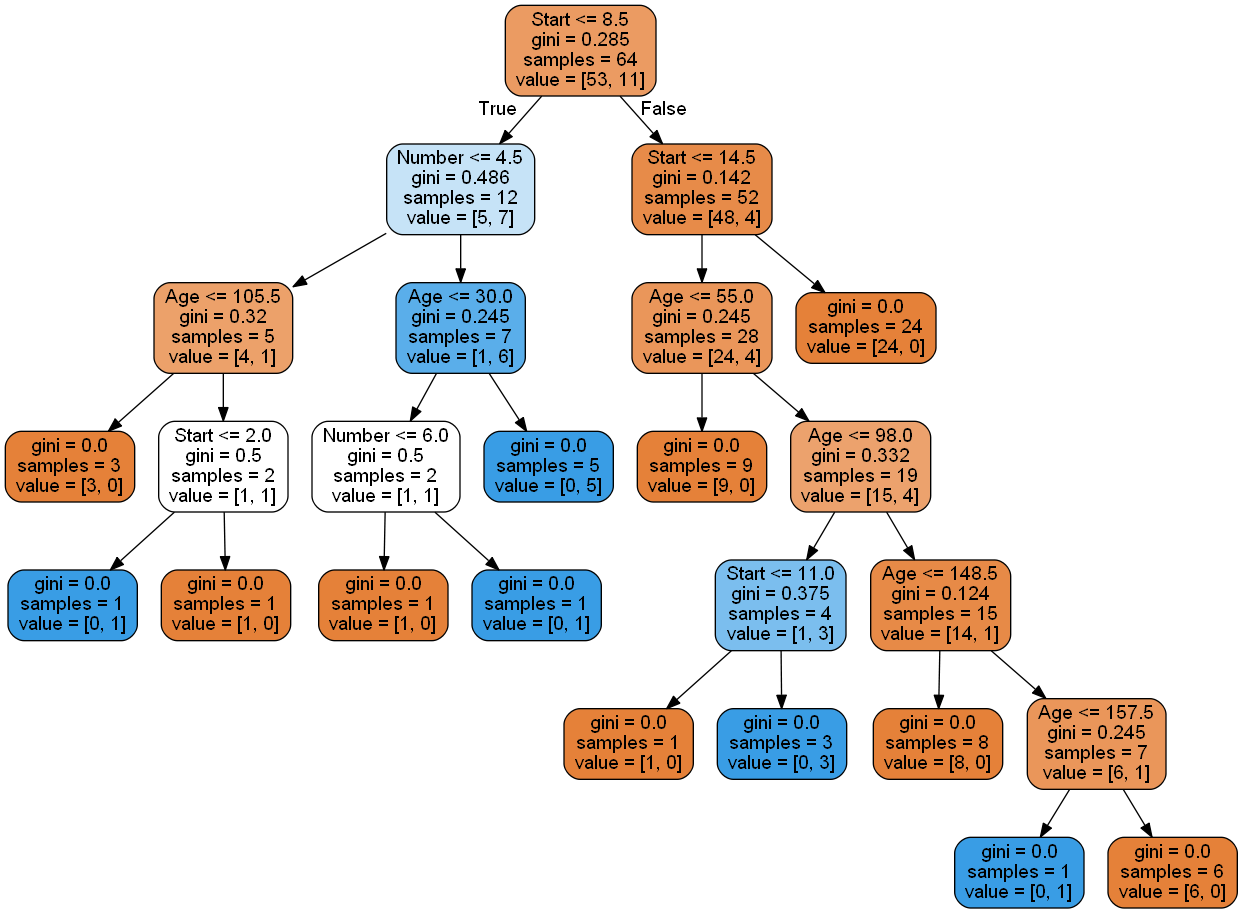

In [41]:
graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())